In [1]:
from _utils import *

folder_path = '/mnt/home/tudomlumleart/ceph/05_Sox9Dataset/'
    
num_monomers = 80

# Load polys data and then perform linear interpolation
# List all .mat files in the folder and load them
cnc_polys = scipy.io.loadmat(folder_path + 'cncPols.mat')['cncPols'][:num_monomers, :, :]
esc_polys = scipy.io.loadmat(folder_path + 'escPols.mat')['escPols'][:num_monomers, :, :]

esc_polys_interp = interpolate_polymers(esc_polys)
cnc_polys_interp = interpolate_polymers(cnc_polys)

esc_maps_interp = np.array([squareform(pdist(esc_polys_interp[:80, :, i])) for i in range(esc_polys_interp.shape[2])])
cnc_maps_interp = np.array([squareform(pdist(cnc_polys_interp[:80, :, i])) for i in range(cnc_polys_interp.shape[2])])
esc_maps_interp_flat = np.array([x.flatten() for x in esc_maps_interp])
cnc_maps_interp_flat = np.array([x.flatten() for x in cnc_maps_interp])
all_maps_interp = np.concatenate((esc_maps_interp, cnc_maps_interp), axis=0)
all_maps_interp_flat = np.concatenate((esc_maps_interp_flat, cnc_maps_interp_flat), axis=0)

pca = PCA(n_components=2)
pca.fit(all_maps_interp_flat)
esc_maps_pca = pca.transform(esc_maps_interp_flat)
cnc_maps_pca = pca.transform(cnc_maps_interp_flat)

esc_df = pd.DataFrame(esc_maps_pca, columns=['PC1', 'PC2'])
esc_df['label'] = 'ESC'
cnc_df = pd.DataFrame(cnc_maps_pca, columns=['PC1', 'PC2'])
cnc_df['label'] = 'CNC'
all_df = pd.concat([esc_df, cnc_df], axis=0)

# Find lower bound and upper bound of PC1 and PC2 data
l = 0.01
u = 1-l

pc1_l = all_df['PC1'].quantile(l)
pc1_u = all_df['PC1'].quantile(u)
pc2_l = all_df['PC2'].quantile(l)
pc2_u = all_df['PC2'].quantile(u)



2024-09-20 17:30:42.712270: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-20 17:30:42.739735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI AVX512_BF16, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
pc1_grid = np.linspace(pc1_l, pc1_u, 10)
pc2_grid = np.linspace(pc2_l, pc2_u, 10)

pc1_interval = pc1_grid[1] - pc1_grid[0]
pc2_interval = pc2_grid[1] - pc2_grid[0]

pc1_bin_edges = np.concatenate((pc1_grid - 0.5*pc1_interval, [pc1_grid[-1] + 0.5*pc1_interval]))
pc2_bin_edges = np.concatenate((pc2_grid - 0.5*pc2_interval, [pc2_grid[-1] + 0.5*pc2_interval]))

In [5]:
pc1_grid

array([-24851.3342834 , -20193.16701328, -15534.99974317, -10876.83247305,
        -6218.66520294,  -1560.49793283,   3097.66933729,   7755.8366074 ,
        12414.00387752,  17072.17114763])

In [6]:
pc1_bin_edges

array([-27180.41791845, -22522.25064834, -17864.08337823, -13205.91610811,
        -8547.748838  ,  -3889.58156788,    768.58570223,   5426.75297234,
        10084.92024246,  14743.08751257,  19401.25478269])

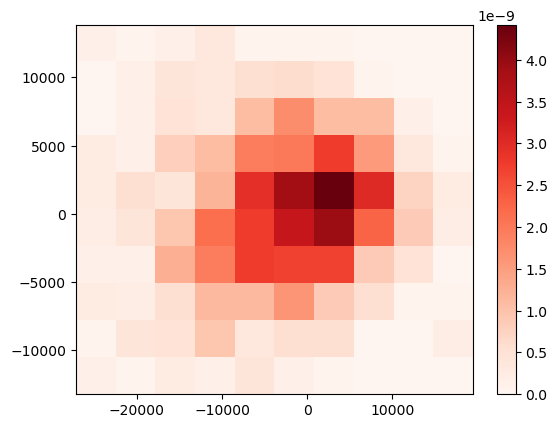

In [22]:
# Create the 2D histogram using numpy.histogram2d
H_esc, x_edges, y_edges = np.histogram2d(esc_df.PC1, esc_df.PC2, bins=[pc1_bin_edges, pc2_bin_edges], density=True)

# Plotting the 2D histogram using plt.imshow
plt.imshow(H_esc.T, origin='lower', aspect='auto', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], cmap='Reds')
plt.colorbar()

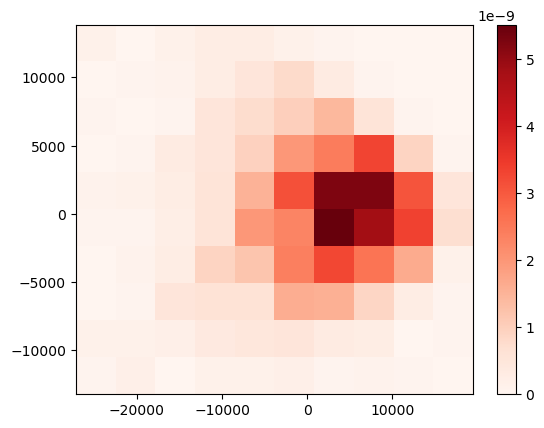

In [21]:
# Create the 2D histogram using numpy.histogram2d
H_cnc, x_edges, y_edges = np.histogram2d(cnc_df.PC1, cnc_df.PC2, bins=[pc1_bin_edges, pc2_bin_edges], density=True)

# Plotting the 2D histogram using plt.imshow
plt.imshow(H_cnc.T, origin='lower', aspect='auto', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], cmap='Reds')
plt.colorbar()

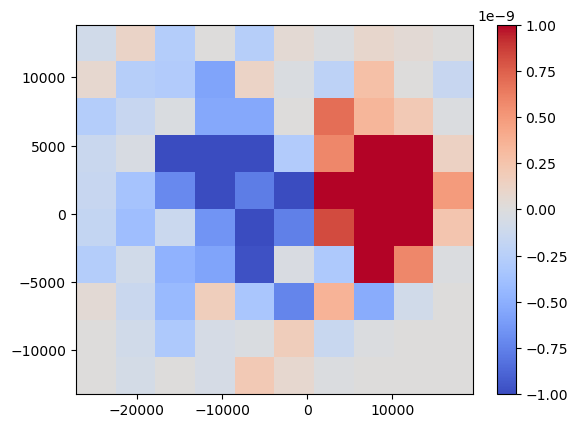

In [34]:
plt.imshow((H_cnc-H_esc).T, cmap='coolwarm', vmin=-1E-9, vmax=1E-9,
           extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], aspect='auto')
plt.colorbar()

/tmp/ipykernel_731819/3631964203.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.imshow(np.log(H_cnc/H_esc).T, cmap='coolwarm', vmin=-2, vmax=2,
/tmp/ipykernel_731819/3631964203.py:1: RuntimeWarning: invalid value encountered in divide
  plt.imshow(np.log(H_cnc/H_esc).T, cmap='coolwarm', vmin=-2, vmax=2,
/tmp/ipykernel_731819/3631964203.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(H_cnc/H_esc).T, cmap='coolwarm', vmin=-2, vmax=2,


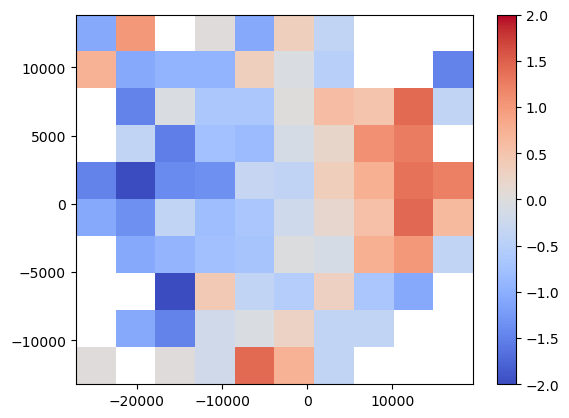

In [35]:
plt.imshow(np.log(H_cnc/H_esc).T, cmap='coolwarm', vmin=-2, vmax=2,
           extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], aspect='auto')
plt.colorbar()